In [0]:
# Miguel Romo 20182020027
# Bryan Muñoz 20162020408

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil as dateutil
from pandas.plotting import scatter_matrix
import matplotlib.colors as cl

# data = pd.read_csv("TraficoDeInternetMovil.csv", index_col="ANNO")
data = pd.read_csv("TraficoDeInternetMovil.csv")
dataCovid = pd.read_csv("covid7-6.csv")




In [0]:
from google.colab import drive
drive.mount('/content/drive')

LIMPIEZA

In [0]:
# csv TRAFICO DE INTERNET MOVIL
data[["TRAFICO"]] = data["TRAFICO"].str.replace(',','.')
data[["TRAFICO"]] = data["TRAFICO"].replace('-','0')
data = data.astype({'TRAFICO': float})
data["TRAFICO"]
media = data[["TRAFICO"]].mean()
data[["TRAFICO"]] = data[["TRAFICO"]].replace(0,media)
# csv COVID19
dataCovid = pd.read_csv("covid7-6.csv", index_col='ID de caso')
dataCovid['Fecha de muerte'].replace('-   -',np.nan, inplace=True)
dataCovid['Fecha de muerte'].replace('/  /',np.nan, inplace=True)
dataCovid['Fecha recuperado'].replace('-   -',np.nan, inplace=True)
dataCovid['Fecha diagnostico'].replace('SIN DATO',np.nan, inplace=True)
S11 = dataCovid['Fecha diagnostico'].dropna().apply(dateutil.parser.parse, yearfirst=True).value_counts().sort_index(ascending=True)
S22 = dataCovid['Fecha de muerte'].dropna().apply(dateutil.parser.parse, yearfirst=True).value_counts().sort_index(ascending=True)
S33 = dataCovid['Fecha recuperado'].dropna().apply(dateutil.parser.parse, yearfirst=True).value_counts().sort_index(ascending=True)
s44 = dataCovid['Ciudad de ubicación']
dataCovid1=pd.DataFrame(dataCovid).fillna(value=0)

PLOT

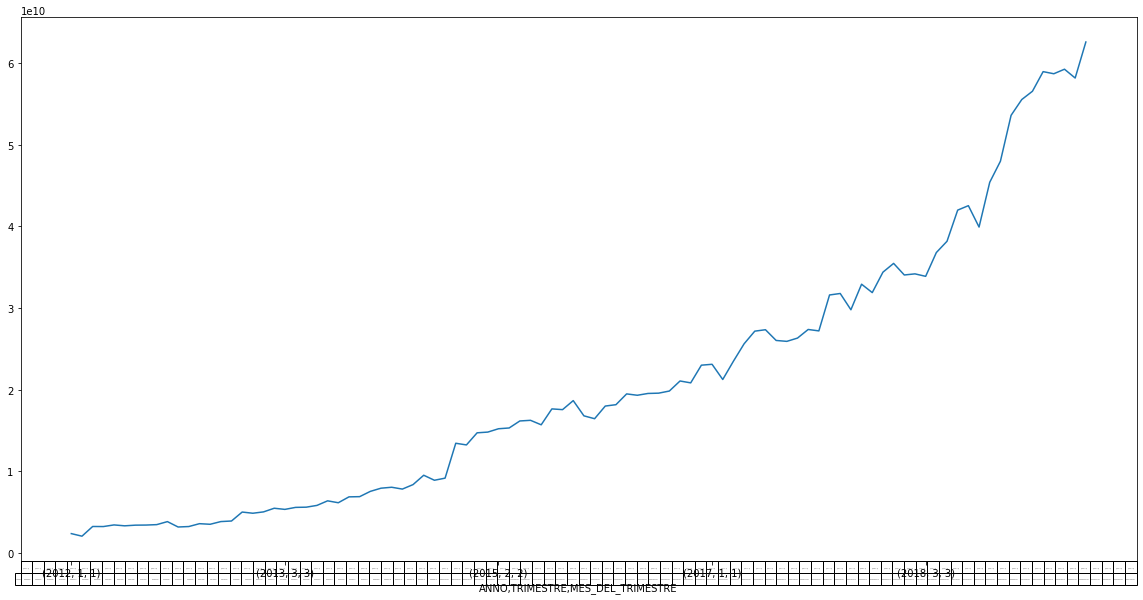

In [253]:
# data['TRAFICO'].cumsum().plot(x='ANNO',y='TRAFICO')
data.groupby(['ANNO','TRIMESTRE','MES_DEL_TRIMESTRE'])['TRAFICO'].sum().plot(figsize=(20,10))

BAR

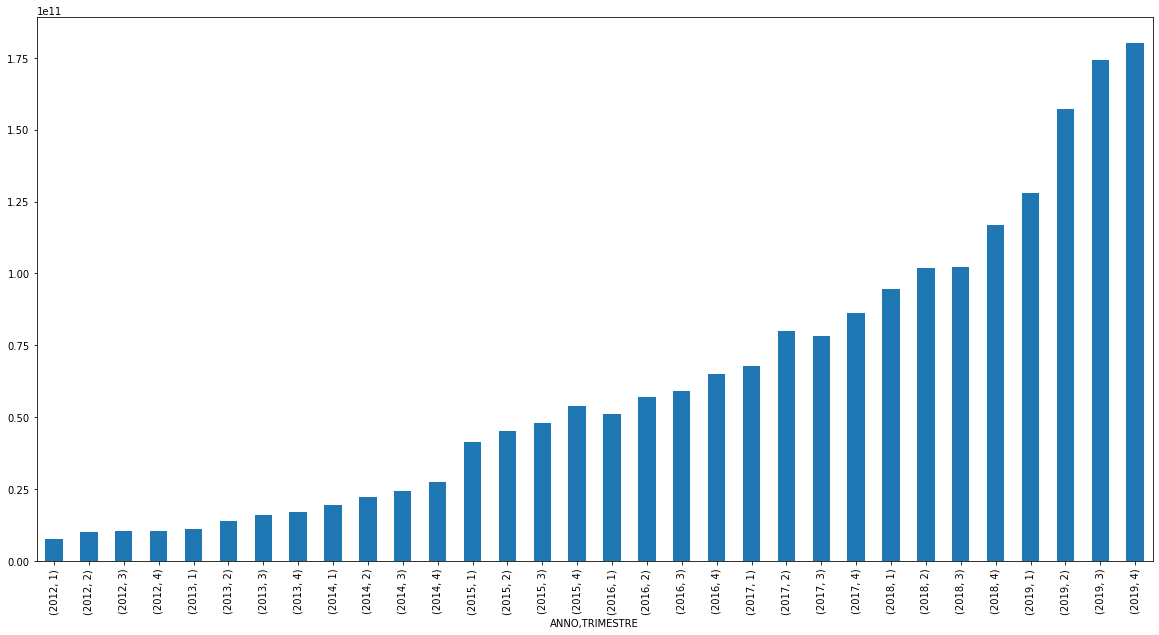

In [0]:

data.groupby(['ANNO','TRIMESTRE'])['TRAFICO'].sum().plot(kind = 'bar', figsize=(20,10))


HIST

     Colombia movil       Avantel        Virgin  Exito
6      9.647630e+08           NaN           NaN    NaN
9      9.518172e+08           NaN           NaN    NaN
13     1.037662e+09           NaN           NaN    NaN
16     9.704729e+08           NaN           NaN    NaN
19     1.016294e+09           NaN           NaN    NaN
..              ...           ...           ...    ...
562    6.133713e+09           NaN           NaN    NaN
565             NaN           NaN  3.052746e+09    NaN
567             NaN  4.981602e+09           NaN    NaN
568    6.562090e+09           NaN           NaN    NaN
571             NaN           NaN  3.052746e+09    NaN

[236 rows x 4 columns]
6      9.647630e+08
9      9.518172e+08
13     1.037662e+09
16     9.704729e+08
19     1.016294e+09
           ...     
542    6.042415e+09
549    5.987712e+09
556    6.559470e+09
562    6.133713e+09
568    6.562090e+09
Name: TRAFICO, Length: 94, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f796ee27d68>,
      dtype=object)

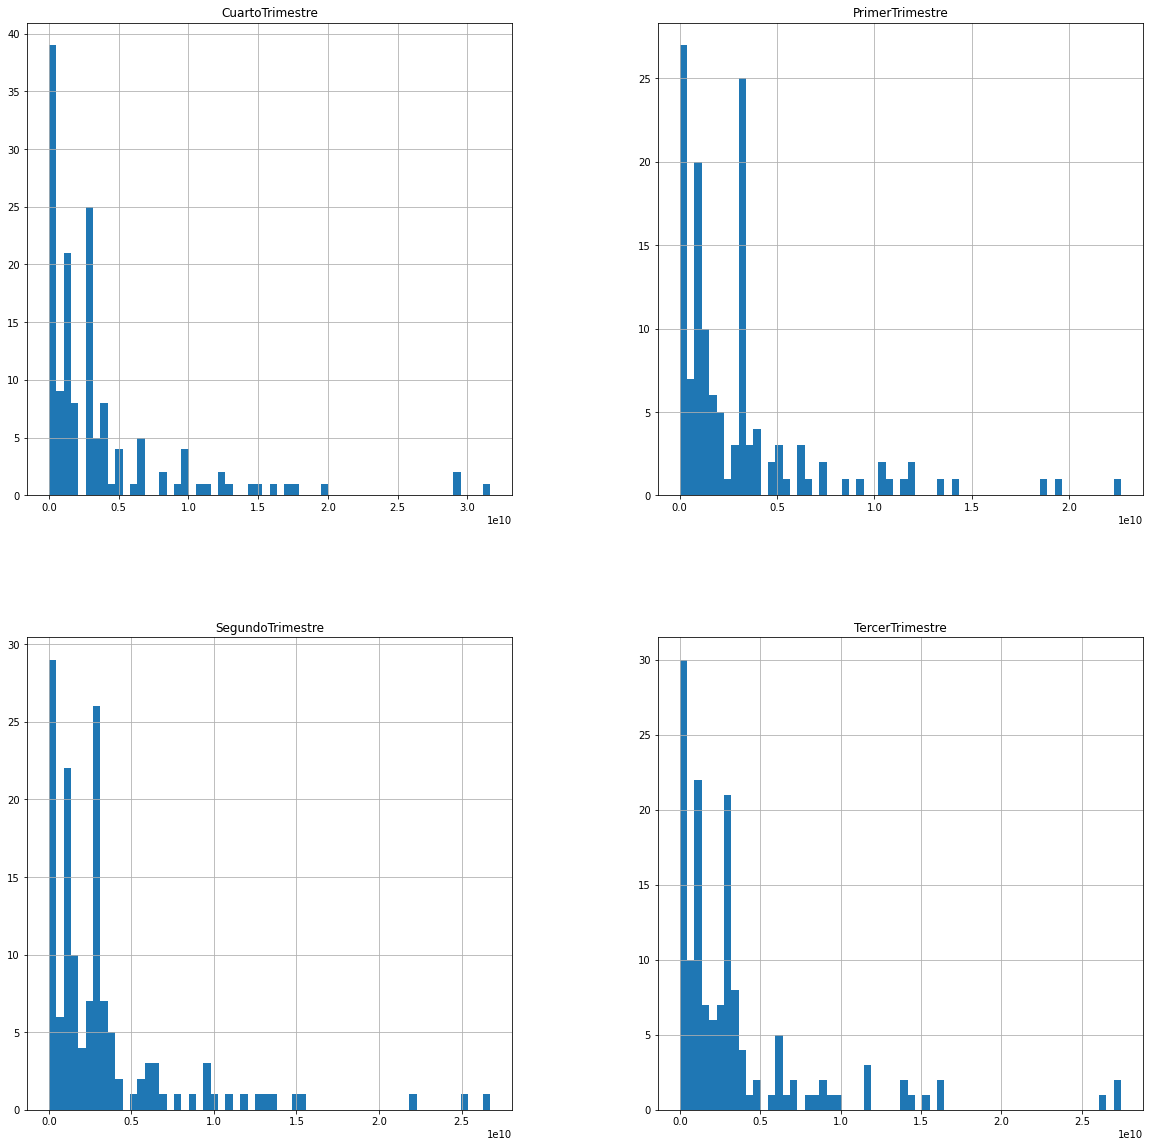

In [0]:

s1 = data['TRAFICO'][data['TRIMESTRE'] == 1]
s2 = data['TRAFICO'][data['TRIMESTRE'] == 2]
s3 = data['TRAFICO'][data['TRIMESTRE'] == 3]
s4 = data['TRAFICO'][data['TRIMESTRE'] == 4]
frame = { 'PrimerTrimestre' : s1 , 'SegundoTrimestre' : s2 , 'TercerTrimestre' : s3 , 'CuartoTrimestre' : s4}
df1 = pd.DataFrame(frame)

s5 = data['TRAFICO'][data['DESC_EMPRESA']== 'COLOMBIA MOVIL S.A. E.S.P.']
s6 = data['TRAFICO'][data['DESC_EMPRESA']== 'AVANTEL S.A.S.']
s7 = data['TRAFICO'][data['DESC_EMPRESA']== 'VIRGIN MOBILE COLOMBIA S.A.S.']
s8 = data['TRAFICO'][data['DESC_EMPRESA']== 'ALMACENES EXITO INVERSIONES S.A.S.']
frame2= {'Colombia movil': s5, 'Avantel': s6, 'Virgin': s7, 'Exito' : s8}
df2 = pd.DataFrame(frame2)
print(df2)
print(s5)


df1.hist(figsize=(20,20), bins=60)

Box

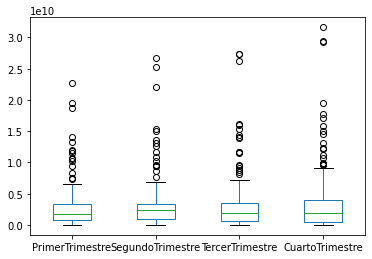

In [0]:
df1.plot.box()

Pie

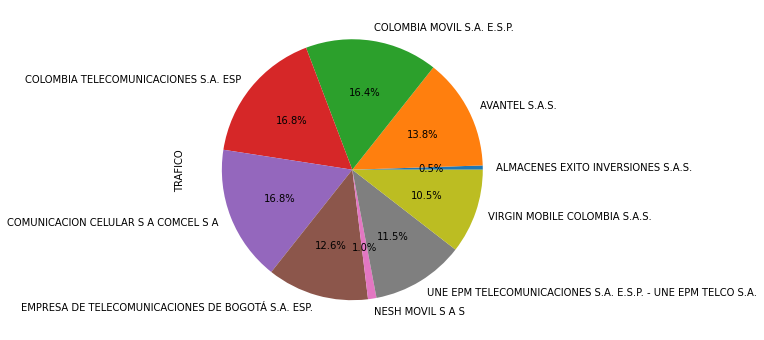

In [0]:

data.groupby('DESC_EMPRESA')['TRAFICO'].count().plot.pie(figsize=(6,6),autopct='%1.1f%%')


Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f796f9f5668>,
      dtype=object)

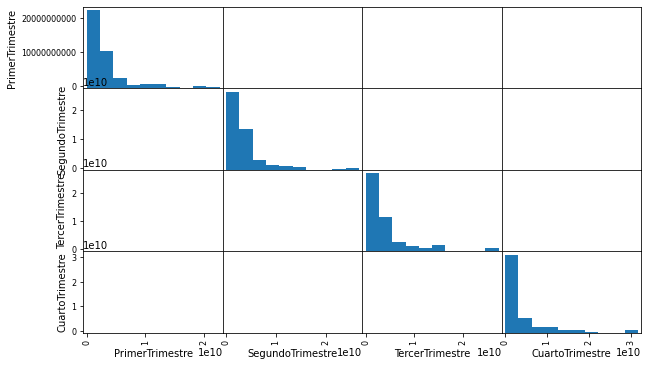

In [0]:

scatter_matrix(df1 ,  figsize=(10,6), diagonal='hist')

Scatter

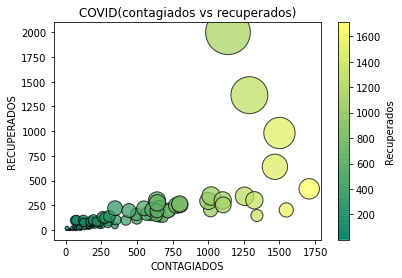

In [0]:
# import matplotlib.pyplot as plt
frame2 = { 'Contagiados': S11, 'Recuperados': S33} 
dataFrameScatter=pd.DataFrame(frame2).fillna(value=0)
contagiados = dataFrameScatter['Contagiados']
recuperados = dataFrameScatter['Recuperados']
plt.title('COVID(contagiados vs recuperados)')
plt.xlabel('CONTAGIADOS')
plt.ylabel('RECUPERADOS')
plt.scatter(contagiados, recuperados, s = recuperados, c = contagiados, cmap='summer', edgecolors='black', linewidths=1,alpha=0.75)
cbar = plt.colorbar(cmap='summer')
cbar.set_label('Recuperados')
plt.show()

Area

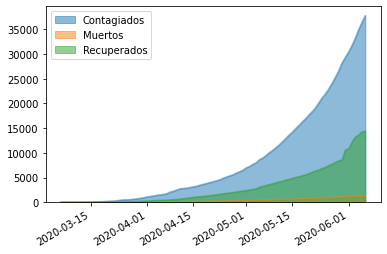

In [0]:
frame1 = { 'Contagiados': S11, 'Muertos': S22, 'Recuperados': S33} 
df9=pd.DataFrame(frame1).fillna(value=0)
df9.cumsum().plot.area(stacked=False)

radViz

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:152: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


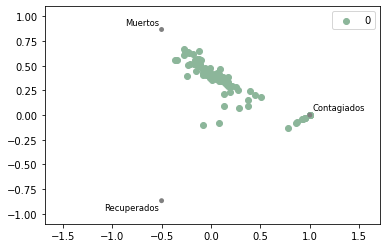

In [0]:

frame = { 'Contagiados': S11, 'Muertos': S22, 'Recuperados': S33 , 'Ciudad' : s44} 
df44=pd.DataFrame(frame).fillna(value=0)
df44 = df44.astype({'Ciudad': str})
rad_viz = pd.plotting.radviz(df44, 'Ciudad' )  

TABLE

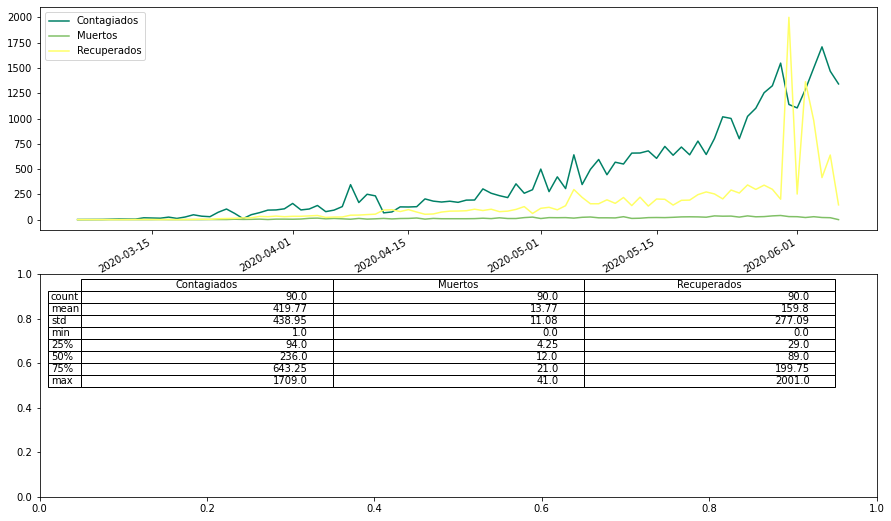

In [338]:
import pandas.plotting as plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
df9.plot(ax=axes[0], legend=True, cmap='summer')
plotting.table(axes[1], np.round(df9.describe(), 2),
               loc='upper center', colWidths=[0.3, 0.3, 0.3])
plt.show()

TABLE